In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
# Load dataset
df = pd.read_csv("amazon_sales_data.csv")

# Display first few rows
print(df.head())

  Order ID Product ID     Category  Sub-Category  Order Date   Ship Date  \
0   ORD001    PROD011       Beauty      Skincare  07-06-2024  10-06-2024   
1   ORD002    PROD012       Beauty      Haircare  11-08-2024  16-08-2024   
2   ORD003    PROD013     Clothing         Jeans  23-01-2025  29-01-2025   
3   ORD004    PROD014         Toys  Stuffed Toys  06-02-2025  13-02-2025   
4   ORD005    PROD015  Electronics       Tablets  30-08-2024  02-09-2024   

  Customer ID    Customer Name     Region      Country   Sales  Quantity  \
0     CUST111       Chris Park  Australia  New Zealand  229.78         3   
1     CUST112   Russell Cooper     Europe      Germany  288.76         2   
2     CUST113  Katelyn Perkins       Asia        China  361.02         1   
3     CUST114     Shane Howard     Europe       France  226.68         1   
4     CUST115  Chelsea Watkins     Europe      Germany  177.60         3   

   Discount  Profit  Shipping Cost Payment Method  Review Score  
0      0.19   25.30 

In [3]:
# Get column details
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        2000 non-null   object 
 1   Product ID      2000 non-null   object 
 2   Category        2000 non-null   object 
 3   Sub-Category    2000 non-null   object 
 4   Order Date      2000 non-null   object 
 5   Ship Date       2000 non-null   object 
 6   Customer ID     2000 non-null   object 
 7   Customer Name   2000 non-null   object 
 8   Region          2000 non-null   object 
 9   Country         2000 non-null   object 
 10  Sales           2000 non-null   float64
 11  Quantity        2000 non-null   int64  
 12  Discount        2000 non-null   float64
 13  Profit          2000 non-null   float64
 14  Shipping Cost   2000 non-null   float64
 15  Payment Method  2000 non-null   object 
 16  Review Score    2000 non-null   int64  
dtypes: float64(4), int64(2), object(1

In [4]:
#Standardize Data (Country Names, Payment Methods)
df["Country"] = df["Country"].replace({"USA": "United States", "U.S.": "United States"})
df["Payment Method"] = df["Payment Method"].str.title()


<ipython-input-7-4bdb80d6486c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")


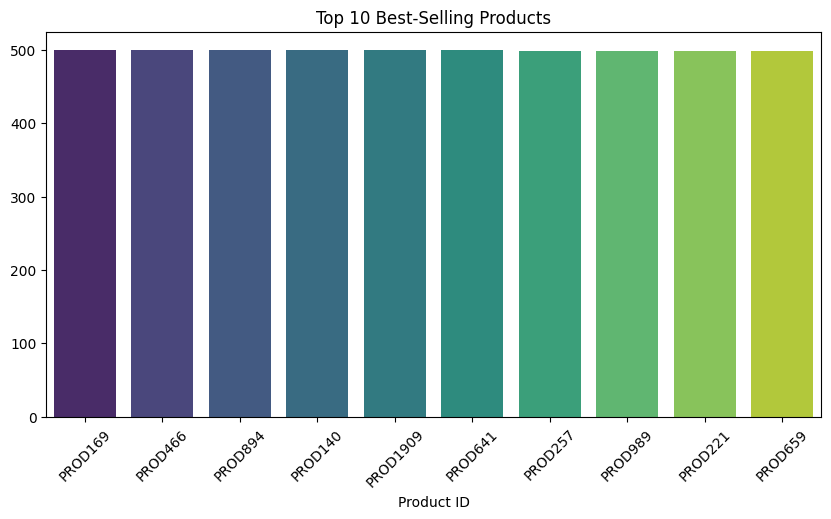

In [7]:
#Top 10 Best-Selling Products
top_products = df.groupby("Product ID")["Sales"].sum().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Best-Selling Products")
plt.show()


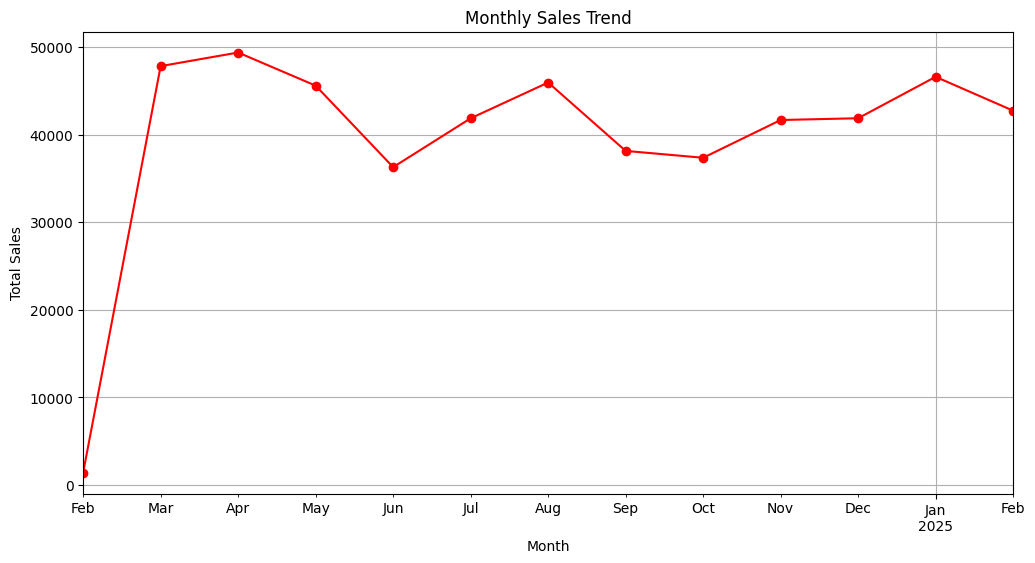

In [10]:
#Monthly Sales Trend
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Month"] = df["Order Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Sales"].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(marker="o", color="red")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


In [9]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d-%m-%Y")


<ipython-input-11-6425c47b8dc1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.index, y=top_regions.values, palette="coolwarm")


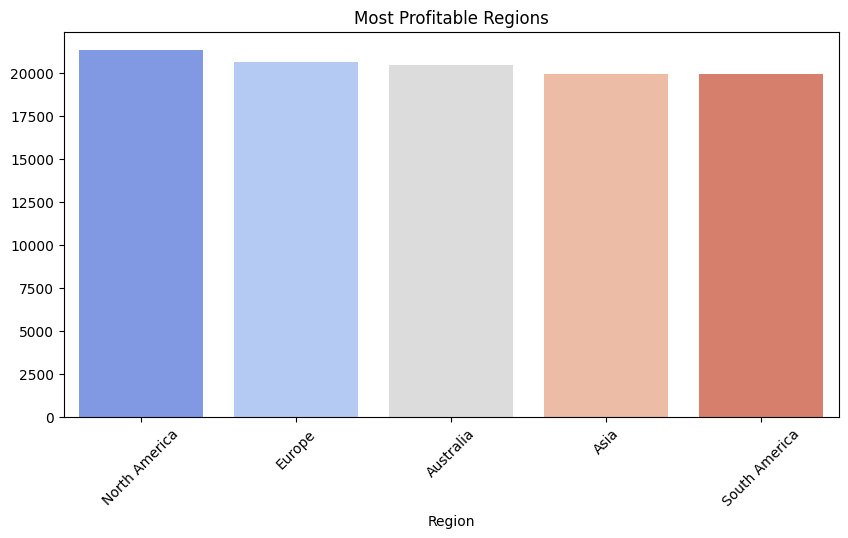

In [11]:
#Most Profitable Regions
top_regions = df.groupby("Region")["Profit"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=top_regions.index, y=top_regions.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Most Profitable Regions")
plt.show()


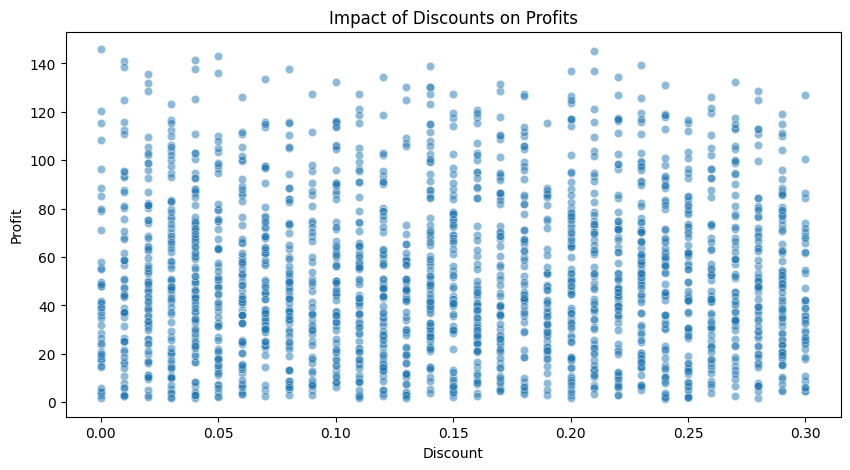

In [12]:
#Impact of Discounts on Profits
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Discount", y="Profit", alpha=0.5)
plt.title("Impact of Discounts on Profits")
plt.show()


In [13]:
#Prepare Data for Machine Learning
df["Month_Num"] = df["Order Date"].dt.month
X = df[["Month_Num", "Discount"]]
y = df["Sales"]


In [14]:
#Split Data & Train Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


# Predict future sales
predictions = model.predict(X_test)


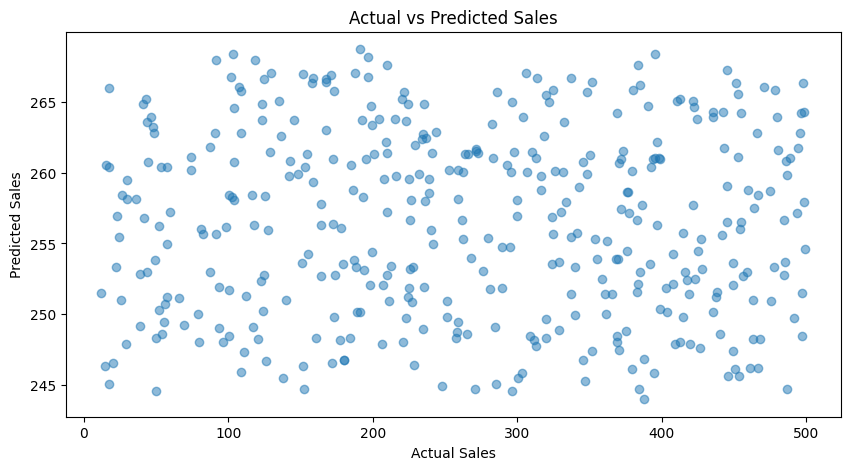

In [15]:
#Display Prediction Results
plt.figure(figsize=(10,5))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()